# Assignment 7 (PCA)

## 201916006

In [41]:
import h5py
import numpy as np
import pandas as pd
path = 'faceimages.mat'
arrays = {}
input_file = h5py.File(path, 'r')
mat = {k:v for k,v in input_file.items() if k[0] != '_'}
mat1 = mat['data']
data = pd.DataFrame({k: pd.Series(v[0]) for k,v in mat.items()})

In [42]:
df1 = pd.DataFrame(mat1).T
df1 

,0,1,2,3,4,5,6,7,8,9,...,10295,10296,10297,10298,10299,10300,10301,10302,10303,10304
0,48.0,46.0,47.0,48.0,47.0,47.0,49.0,53.0,51.0,54.0,...,43.0,47.0,48.0,48.0,48.0,46.0,45.0,46.0,47.0,0.0
1,59.0,63.0,67.0,81.0,54.0,37.0,60.0,46.0,58.0,62.0,...,39.0,33.0,33.0,33.0,35.0,35.0,34.0,33.0,34.0,0.0
2,40.0,50.0,51.0,52.0,64.0,73.0,68.0,60.0,49.0,47.0,...,35.0,33.0,31.0,31.0,31.0,30.0,28.0,27.0,28.0,0.0
3,62.0,55.0,46.0,42.0,42.0,43.0,37.0,30.0,33.0,27.0,...,40.0,35.0,33.0,28.0,23.0,23.0,26.0,28.0,27.0,0.0
4,62.0,64.0,61.0,59.0,56.0,42.0,27.0,23.0,36.0,55.0,...,43.0,41.0,42.0,42.0,41.0,39.0,38.0,38.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,125.0,125.0,126.0,127.0,127.0,126.0,125.0,125.0,120.0,119.0,...,36.0,40.0,45.0,43.0,40.0,41.0,41.0,39.0,41.0,0.0
396,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,129.0,...,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,0.0
397,121.0,122.0,123.0,123.0,123.0,121.0,119.0,118.0,124.0,120.0,...,41.0,39.0,44.0,44.0,41.0,41.0,40.0,39.0,39.0,0.0
398,118.0,118.0,118.0,119.0,119.0,120.0,120.0,120.0,115.0,119.0,...,93.0,96.0,92.0,94.0,94.0,90.0,90.0,92.0,89.0,0.0


In [43]:
# Mean-centering the data
for c in df1:
    m = df1[c].mean()
    df1[c] = df1[c] - m

In [44]:
df1

,0,1,2,3,4,5,6,7,8,9,...,10295,10296,10297,10298,10299,10300,10301,10302,10303,10304
0,-37.7275,-39.91,-38.8825,-37.8925,-39.1125,-39.1775,-37.0975,-33.1425,-35.13,-32.2525,...,-23.015,-19.8075,-19.8275,-21.285,-23.3525,-26.025,-27.105,-27.8,-28.3925,-0.2975
1,-26.7275,-22.91,-18.8825,-4.8925,-32.1125,-49.1775,-26.0975,-40.1425,-28.13,-24.2525,...,-27.015,-33.8075,-34.8275,-36.285,-36.3525,-37.025,-38.105,-40.8,-41.3925,-0.2975
2,-45.7275,-35.91,-34.8825,-33.8925,-22.1125,-13.1775,-18.0975,-26.1425,-37.13,-39.2525,...,-31.015,-33.8075,-36.8275,-38.285,-40.3525,-42.025,-44.105,-46.8,-47.3925,-0.2975
3,-23.7275,-30.91,-39.8825,-43.8925,-44.1125,-43.1775,-49.0975,-56.1425,-53.13,-59.2525,...,-26.015,-31.8075,-34.8275,-41.285,-48.3525,-49.025,-46.105,-45.8,-48.3925,-0.2975
4,-23.7275,-21.91,-24.8825,-26.8925,-30.1125,-44.1775,-59.0975,-63.1425,-50.13,-31.2525,...,-23.015,-25.8075,-25.8275,-27.285,-30.3525,-33.025,-34.105,-35.8,-36.3925,-0.2975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39.2725,39.09,40.1175,41.1075,40.8875,39.8225,38.9025,38.8575,33.87,32.7475,...,-30.015,-26.8075,-22.8275,-26.285,-31.3525,-31.025,-31.105,-34.8,-34.3925,-0.2975
396,42.2725,42.09,42.1175,42.1075,41.8875,41.8225,41.9025,41.8575,41.87,42.7475,...,26.985,26.1925,25.1725,23.715,21.6475,20.975,20.895,19.2,17.6075,-0.2975
397,35.2725,36.09,37.1175,37.1075,36.8875,34.8225,32.9025,31.8575,37.87,33.7475,...,-25.015,-27.8075,-23.8275,-25.285,-30.3525,-31.025,-32.105,-34.8,-36.3925,-0.2975
398,32.2725,32.09,32.1175,33.1075,32.8875,33.8225,33.9025,33.8575,28.87,32.7475,...,26.985,29.1925,24.1725,24.715,22.6475,17.975,17.895,18.2,13.6075,-0.2975


In [45]:
df2 = np.array(df1)

In [46]:
# Co-variance of the data matrix
cov = np.cov(df2.T)

In [47]:
cov.shape

(10305, 10305)

In [48]:
print(cov)

[[ 1.27932656e+03  1.26883256e+03  1.25975737e+03 ... -2.07218045e+00
  -5.86346303e+01 -3.87110902e+00]
 [ 1.26883256e+03  1.26408211e+03  1.25736784e+03 ... -5.59197995e+00
  -6.27515539e+01 -3.77766917e+00]
 [ 1.25975737e+03  1.25736784e+03  1.25529694e+03 ... -4.37694236e+00
  -5.91718108e+01 -3.70681078e+00]
 ...
 [-2.07218045e+00 -5.59197995e+00 -4.37694236e+00 ...  1.77720802e+03
   1.78067268e+03  2.15488722e+00]
 [-5.86346303e+01 -6.27515539e+01 -5.91718108e+01 ...  1.78067268e+03
   1.93941699e+03  2.59722431e+00]
 [-3.87110902e+00 -3.77766917e+00 -3.70681078e+00 ...  2.15488722e+00
   2.59722431e+00  2.09517544e-01]]


In [49]:
#Eigen Values & Vectors from covariance matrix
eigenValues, eigenVectors = np.linalg.eig(cov)
print("Eigen Values:  {} \n".format(eigenValues))
print("Eigen Vectors: {} \n".format(eigenVectors))

Eigen Values:  [6.92968561e-310+6.92968091e-310j 6.92968713e-310+6.92968091e-310j
 3.50000000e+001+1.65000000e+002j ... 7.40000000e+001+5.60000000e+001j
 4.60000000e+001+5.10000000e+001j 4.50000000e+001+1.36000000e+002j] 

Eigen Vectors: [[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]] 



In [50]:
# initializing the pca
import matplotlib.pyplot as plt
from sklearn import decomposition
pca = decomposition.PCA()

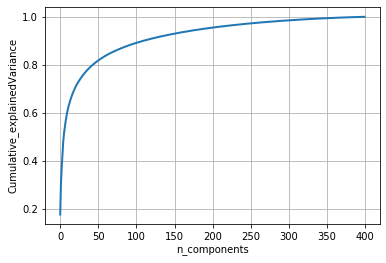

In [51]:
# PCA for dimensionality redcution
pca_data = pca.fit_transform(df2)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the energy curve of PCA
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explainedVariance')
plt.show()

# If we take 200-dimensions, approx. 95% of variance is explained.

In [52]:
# Projection matrix with 300 pricipal components
pca.n_components = 300
lowdimdata = pca.fit_transform(df2)
lowdimdata_df = pd.DataFrame(data = lowdimdata)
lowdimdata_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1528.387559,-1074.573843,-1865.264487,-263.049165,-690.306966,127.116011,-425.689089,374.924246,442.282992,-1029.678499,...,13.803655,7.445567,-62.572663,34.242013,-74.173855,-85.269952,155.598643,-86.757440,46.087009,5.571634
1,2976.323373,-762.488394,464.182310,-1196.319087,-2510.476483,-385.945395,-1232.637425,-330.966730,384.962802,72.781346,...,-29.380933,32.044487,-2.924562,6.807622,3.301262,8.727468,-26.830734,-110.463819,22.463395,105.896784
2,2696.632841,-379.312931,-1003.866148,33.285337,-1032.559401,1081.990970,-461.275125,-243.575701,1121.672729,-819.880722,...,89.194242,31.526028,-17.578819,15.881124,26.836475,0.709728,-20.093514,17.536465,-14.780065,-23.749634
3,3241.182438,-1161.562680,230.458352,-2717.415928,15.945138,816.015917,673.378904,967.141201,-486.796328,-887.737103,...,1.661426,35.554599,-53.435801,-6.957805,-30.224393,-19.862139,4.617532,24.847157,-0.341502,35.038673
4,3644.144540,-812.920371,-118.612602,-2124.642132,-220.637392,461.346840,-532.739364,-205.954092,-108.101633,-116.909140,...,107.244521,3.779910,45.216871,-14.709315,-98.074092,-78.360280,60.682120,11.054009,-38.297258,-70.436449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,654.897516,-1033.419834,1574.908024,478.806568,-3.403356,478.892962,-51.154558,-1156.240781,905.215859,-467.886316,...,-175.202042,-101.085796,46.979865,-82.915912,-66.910454,-19.248562,-100.779310,73.983419,-30.156780,-5.720833
396,1139.765012,-1264.504624,1058.023811,620.250051,-371.381449,428.331697,380.717298,939.144049,-170.677750,-45.824020,...,-78.494856,23.678209,63.403062,-29.652592,47.481255,-27.184858,43.064234,16.277059,38.404939,-71.072874
397,843.045986,-952.108778,1539.746484,238.296210,558.256754,191.497855,-104.740008,-796.628135,1069.359507,-274.597787,...,51.546460,22.445629,-5.569787,41.072119,-35.093404,100.269436,57.432798,-132.304379,95.864579,50.040649
398,1400.073540,-1276.514206,807.532900,-116.193442,-292.718621,801.572719,1041.488890,1321.986966,-470.881288,40.059405,...,52.396131,-77.100443,52.136462,-12.155128,-77.478737,-75.853962,11.874895,-8.683287,12.441305,82.188874


In [53]:
# Reconstruction error for 300 principal components
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
r2 = r2_score(df2[:,:300],lowdimdata)
rmse = sqrt(mean_squared_error(df2[:,:300],lowdimdata))
rmse

232.09122960632587

In [54]:
# Projection matrix with 5 principal components
pca.n_components = 5
lowdimdata = pca.fit_transform(df2)
lowdimdata_df = pd.DataFrame(data = lowdimdata)
lowdimdata_df

,0,1,2,3,4
0,1528.387559,-1074.573843,-1865.264535,-263.049444,-690.305876
1,2976.323373,-762.488394,464.182121,-1196.319071,-2510.476658
2,2696.632841,-379.312931,-1003.866141,33.285059,-1032.557320
3,3241.182438,-1161.562681,230.458436,-2717.416335,15.946107
4,3644.144540,-812.920371,-118.612688,-2124.642020,-220.636651
...,...,...,...,...,...
395,654.897516,-1033.419832,1574.907791,478.806521,-3.405253
396,1139.765012,-1264.504625,1058.023853,620.250186,-371.380771
397,843.045986,-952.108776,1539.746370,238.296648,558.255395
398,1400.073540,-1276.514208,807.532971,-116.193507,-292.716576


In [55]:
# Reconstruction error for 5 principal components
r2 = r2_score(data2[:,:5],lowdimdata)
rmse = sqrt(mean_squared_error(data2[:,:5],lowdimdata))
rmse

1240.8493906288368

In [56]:
# Projection matrix with 10 principal components
pca.n_components = 10
lowdimdata = pca.fit_transform(df2)
lowdimdata_df = pd.DataFrame(data = lowdimdata)
lowdimdata_df

,0,1,2,3,4,5,6,7,8,9
0,1528.387559,-1074.573843,-1865.264426,-263.049165,-690.306671,127.120687,-425.609337,374.972883,441.748535,-1029.939249
1,2976.323373,-762.488394,464.182299,-1196.319087,-2510.476534,-385.946021,-1232.636462,-330.963433,384.999819,72.838629
2,2696.632841,-379.312931,-1003.866122,33.285298,-1032.559284,1081.993452,-461.223404,-243.539585,1121.397928,-819.971309
3,3241.182438,-1161.562679,230.458321,-2717.415755,15.944987,816.019778,673.261429,967.097873,-486.448339,-887.957155
4,3644.144540,-812.920370,-118.612653,-2124.641995,-220.637639,461.347324,-532.850091,-205.999701,-107.649904,-116.946332
...,...,...,...,...,...,...,...,...,...,...
395,654.897516,-1033.419834,1574.908070,478.806637,-3.403127,478.898414,-51.120765,-1156.213023,904.833313,-468.240520
396,1139.765012,-1264.504624,1058.023793,620.250200,-371.381525,428.334780,380.648152,939.125645,-170.509582,-46.035320
397,843.045986,-952.108778,1539.746515,238.296246,558.256908,191.501653,-104.718088,-796.612164,1069.090631,-274.856878
398,1400.073540,-1276.514206,807.532906,-116.193476,-292.718600,801.572519,1041.502518,1321.991043,-470.959869,40.061546


In [57]:
# Reconstruction error for 10 principal components
r2 = r2_score(data2[:,:10],lowdimdata)
rmse = sqrt(mean_squared_error(df2[:,:10],lowdimdata))
rmse

980.3075784629849

In [58]:
# Projection matrix with 50 principal components
pca.n_components = 50
lowdimdata = pca.fit_transform(df2)
lowdimdata_df = pd.DataFrame(data = lowdimdata)
lowdimdata_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1528.387559,-1074.573843,-1865.264462,-263.049147,-690.307007,127.115637,-425.688013,374.924229,442.283452,-1029.684285,...,162.514982,-359.810176,-193.437243,221.019356,29.173254,32.963458,47.764450,-425.976954,144.866158,-12.086949
1,2976.323372,-762.488394,464.182317,-1196.319080,-2510.476518,-385.946443,-1232.636294,-330.964555,384.962067,72.774190,...,-199.172489,15.099788,-217.227674,-219.420395,52.787365,270.143821,19.424104,9.233334,-38.519236,-601.592284
2,2696.632841,-379.312932,-1003.866137,33.285330,-1032.559459,1081.990887,-461.274098,-243.576497,1121.674589,-819.881079,...,-96.779521,-209.614497,161.218635,174.506392,279.986947,386.465537,354.077245,-219.882517,-65.736521,-364.797509
3,3241.182438,-1161.562680,230.458378,-2717.415934,15.945150,816.015492,673.377952,967.139840,-486.789341,-887.746452,...,-143.767853,117.671967,190.733131,-111.239073,-84.082750,-85.667695,-167.020737,94.575321,17.781867,83.156645
4,3644.144540,-812.920371,-118.612613,-2124.642141,-220.637354,461.346655,-532.740593,-205.954055,-108.099032,-116.908706,...,-92.349445,-220.446101,-246.363825,-433.386744,228.359817,-114.030282,34.166729,-105.895732,148.147185,-243.240575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,654.897515,-1033.419835,1574.908024,478.806586,-3.403382,478.892850,-51.153072,-1156.239843,905.214787,-467.879819,...,129.196328,-274.834436,-271.301149,-217.890425,-68.288775,-1.080978,15.113307,-23.755648,85.704211,72.753856
396,1139.765012,-1264.504624,1058.023811,620.250057,-371.381432,428.331331,380.716942,939.143741,-170.678619,-45.824236,...,57.607374,-103.733124,-17.501518,-281.912467,405.722751,-137.179555,-22.983977,104.853969,322.566580,114.929344
397,843.045986,-952.108777,1539.746495,238.296196,558.256732,191.497288,-104.739898,-796.624249,1069.360494,-274.603624,...,44.458583,-307.791083,-77.031363,10.577429,56.580969,288.288134,22.484016,3.391290,-85.674704,90.014507
398,1400.073540,-1276.514207,807.532888,-116.193439,-292.718676,801.572606,1041.489623,1321.986946,-470.885275,40.066049,...,-95.818807,-307.255777,-292.336600,-220.046248,127.822732,-134.376841,-360.152876,147.594718,-216.701652,298.001802


In [59]:
# Reconstruction error for 50 principal components
r2 = r2_score(data2[:,:50],lowdimdata)
rmse = sqrt(mean_squared_error(df2[:,:50],lowdimdata))
rmse

511.8688612907902

In [60]:
# Projection matrix with 100 principal components
pca.n_components = 100
lowdimdata = pca.fit_transform(df2)
lowdimdata_df = pd.DataFrame(data = lowdimdata)
lowdimdata_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1528.387559,-1074.573843,-1865.264487,-263.049164,-690.306966,127.116003,-425.689127,374.924230,442.283045,-1029.678472,...,-62.058102,5.860390,122.066160,-12.526518,-16.826543,-45.304852,-57.379266,-2.763592,35.915788,12.478858
1,2976.323373,-762.488394,464.182310,-1196.319088,-2510.476483,-385.945401,-1232.637426,-330.966735,384.962812,72.781365,...,-172.686954,67.240489,-80.067378,-204.433538,247.512762,187.166336,11.060194,242.914352,-66.928183,182.049990
2,2696.632841,-379.312931,-1003.866149,33.285337,-1032.559400,1081.990963,-461.275037,-243.575680,1121.672684,-819.880795,...,56.837094,27.463082,230.156853,224.196698,218.260850,-22.811461,204.138705,231.757609,120.570987,87.513993
3,3241.182438,-1161.562680,230.458351,-2717.415930,15.945140,816.015905,673.378937,967.141133,-486.796252,-887.737126,...,74.086795,85.692869,-14.245941,-60.091391,-136.735122,58.176707,-37.708370,143.001392,-56.195746,-10.156159
4,3644.144540,-812.920371,-118.612602,-2124.642131,-220.637393,461.346851,-532.739362,-205.954042,-108.101718,-116.909169,...,-130.561696,-92.634790,-5.522282,-141.455303,-44.210836,-47.508747,20.878009,183.410979,59.542737,-23.233020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,654.897516,-1033.419834,1574.908024,478.806569,-3.403357,478.892971,-51.154592,-1156.240736,905.215859,-467.886415,...,136.983270,-28.584509,-6.755030,138.981203,67.019575,14.633076,-57.205813,-52.384397,168.669134,168.778314
396,1139.765012,-1264.504624,1058.023811,620.250052,-371.381450,428.331704,380.717304,939.144055,-170.677832,-45.824047,...,68.199385,-16.610520,23.008956,-176.128834,-30.887950,-20.083761,68.094754,-93.431161,8.460224,-84.794708
397,843.045986,-952.108778,1539.746484,238.296210,558.256754,191.497862,-104.740000,-796.628108,1069.359494,-274.597751,...,148.801101,-39.807355,22.023598,-136.855892,42.720241,78.232252,-13.852525,-39.404673,76.789657,297.350884
398,1400.073540,-1276.514206,807.532900,-116.193442,-292.718621,801.572730,1041.488901,1321.986925,-470.881245,40.059419,...,-148.285446,91.879843,91.975136,83.774336,91.562298,59.635654,-188.245075,-27.113487,-108.139244,104.764233


In [61]:
# Reconstruction error for 100 principal components
r2 = r2_score(data2[:,:100],lowdimdata)
rmse = sqrt(mean_squared_error(df2[:,:100],lowdimdata))
rmse

378.8651002714159